# Capstone Project: English Premier League Predictions

# Part 3 - Preprocessing, Modeling & Evaluation for Result

In this notebook, we will be training the model for our target variable, Result. We will be using the dataset which we have combined in the previous notebook. 

The models used to train will be as followed in the contents. We will grid search for the best parameters for each models then use it with the models.

### Contents:

- [Preparing Dataset for Prediction of Result](#Preparing-Dataset-for-Prediction-of-Result)
    - [Removing Null Values](#Removing-Null-Values)
    - [Removing Features that will be Irrelevant](#Removing-Features-that-will-be-Irrelevant)
    
- [Modeling](#Modeling)
    - [Train Test Split](#Train-Test-Split)
    - [Logistic Regression](#Logistic-Regression)
    - [Random Forest Classification](#Random-Forest-Classification)
    - [ExtraTrees Classifier](#ExtraTrees-Classifier)
    - [AdaBoost Classifier](#AdaBoost-Classifier)
    - [Gradient Boost Classifier](#Gradient-Boost-Classifier)
    - [Support Vector Classifier](#Support-Vector-Classifier)
    - [Model Evaluation & Selection](#Model-Evaluation-&-Selection)

## Importing Modules & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import functools
import pickle

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score,plot_confusion_matrix,accuracy_score,recall_score,f1_score,precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_graphviz

import warnings
import graphviz
warnings.filterwarnings("ignore")

pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

In [2]:
#Reading in of database
train = pd.read_csv('data/clean/combined_final.csv')

## Preparing Dataset for Prediction of Result

Firstly, we will prepare the final dataset for prediction.We will look through null values and remove features such as current matches stats as they will only happen after a match were to happen.

In [4]:
train.head()

,date,match,home,stadium,attendance,h_gls,h_ast,h_pk,h_pkatt,h_sh,h_sot,h_yellow,h_red,h_touches,h_press,h_tkl,h_int,h_blk,h_xg,h_npxg,h_xa,h_sca,h_gca,h_cmp,h_pass_att,h_pass_prog,h_carries,h_carries_prog,h_dri_succ,h_dri_att,h_yellow2,h_fls,h_fld,h_off,h_crs,h_tklw,h_pkwon,h_pkcon,h_og,h_recov,h_aer_won,h_aer_lost,h_last_5_avrg_gls,h_last_5_avrg_ast,h_last_5_avrg_pk,h_last_5_avrg_pkatt,h_last_5_avrg_sh,h_last_5_avrg_sot,h_last_5_avrg_yellow,h_last_5_avrg_red,h_last_5_touches,h_last_5_avrg_press,h_last_5_avrg_tkl,h_last_5_avrg_int,h_last_5_avrg_blk,h_last_5_avrg_xg,h_last_5_avrg_xa,h_last_5_avrg_sca,h_last_5_avrg_gca,h_last_5_avrg_cmp,h_last_5_avrg_pass_att,h_last_5_avrg_pass_prog,h_last_5_avrg_carries,h_last_5_avrg_carries_prog,h_last_5_avrg_dri_succ,h_last_5_avrg_dri_att,h_last_5_avrg_yellow2,h_last_5_avrg_fls,h_last_5_avrg_fld,h_last_5_avrg_off,h_last_5_avrg_crs,h_last_5_avrg_tklw,h_last_5_avrg_pkwon,h_last_5_avrg_pkcon,h_last_5_avrg_og,h_last_5_avrg_recov,h_last_5_avrg_aer_won,h_last_5_avrg_aer_lost,h_last_3_avrg_gls,h_last_3_avrg_ast,h_last_3_avrg_pk,h_last_3_avrg_pkatt,h_last_3_avrg_sh,h_last_3_avrg_sot,h_last_3_avrg_yellow,h_last_3_avrg_red,h_last_3_touches,h_last_3_avrg_press,h_last_3_avrg_tkl,h_last_3_avrg_int,h_last_3_avrg_blk,h_last_3_avrg_xg,h_last_3_avrg_xa,h_last_3_avrg_sca,h_last_3_avrg_gca,h_last_3_avrg_cmp,h_last_3_avrg_pass_att,h_last_3_avrg_pass_prog,h_last_3_avrg_carries,h_last_3_avrg_carries_prog,h_last_3_avrg_dri_succ,h_last_3_avrg_dri_att,h_last_3_avrg_yellow2,h_last_3_avrg_fls,h_last_3_avrg_fld,h_last_3_avrg_off,h_last_3_avrg_crs,h_last_3_avrg_tklw,h_last_3_avrg_pkwon,h_last_3_avrg_pkcon,h_last_3_avrg_og,h_last_3_avrg_recov,h_last_3_avrg_aer_won,h_last_3_avrg_aer_lost,away,a_gls,a_ast,a_pk,a_pkatt,a_sh,a_sot,a_yellow,a_red,a_touches,a_press,a_tkl,a_int,a_blk,a_xg,a_npxg,a_xa,a_sca,a_gca,a_cmp,a_pass_att,a_pass_prog,a_carries,a_carries_prog,a_dri_succ,a_dri_att,a_yellow2,a_fls,a_fld,a_off,a_crs,a_tklw,a_pwon,a_pkcon,a_og,a_recov,a_aer_won,a_aer_lost,a_last_5_avrg_gls,a_last_5_avrg_ast,a_last_5_avrg_pk,a_last_5_avrg_pkatt,a_last_5_avrg_sh,a_last_5_avrg_sot,a_last_5_avrg_yellow,a_last_5_avrg_red,a_last_5_touches,a_last_5_avrg_press,a_last_5_avrg_tkl,a_last_5_avrg_int,a_last_5_avrg_blk,a_last_5_avrg_xg,a_last_5_avrg_xa,a_last_5_avrg_sca,a_last_5_avrg_gca,a_last_5_avrg_cmp,a_last_5_avrg_pass_att,a_last_5_avrg_pass_prog,a_last_5_avrg_carries,a_last_5_avrg_carries_prog,a_last_5_avrg_dri_succ,a_last_5_avrg_dri_att,a_last_5_avrg_yellow2,a_last_5_avrg_fls,a_last_5_avrg_fld,a_last_5_avrg_off,a_last_5_avrg_crs,a_last_5_avrg_tklw,a_last_5_avrg_pkwon,a_last_5_avrg_pkcon,a_last_5_avrg_og,a_last_5_avrg_recov,a_last_5_avrg_aer_won,a_last_5_avrg_aer_lost,a_last_3_avrg_gls,a_last_3_avrg_ast,a_last_3_avrg_pk,a_last_3_avrg_pkatt,a_last_3_avrg_sh,a_last_3_avrg_sot,a_last_3_avrg_yellow,a_last_3_avrg_red,a_last_3_touches,a_last_3_avrg_press,a_last_3_avrg_tkl,a_last_3_avrg_int,a_last_3_avrg_blk,a_last_3_avrg_xg,a_last_3_avrg_xa,a_last_3_avrg_sca,a_last_3_avrg_gca,a_last_3_avrg_cmp,a_last_3_avrg_pass_att,a_last_3_avrg_pass_prog,a_last_3_avrg_carries,a_last_3_avrg_carries_prog,a_last_3_avrg_dri_succ,a_last_3_avrg_dri_att,a_last_3_avrg_yellow2,a_last_3_avrg_fls,a_last_3_avrg_fld,a_last_3_avrg_off,a_last_3_avrg_crs,a_last_3_avrg_tklw,a_last_3_avrg_pkwon,a_last_3_avrg_pkcon,a_last_3_avrg_og,a_last_3_avrg_recov,a_last_3_avrg_aer_won,a_last_3_avrg_aer_lost,result,h_last5match,h_accumulatpts,a_last5match,a_accumulatpts,h_total_goals,a_total_goals,total_goals,h_total_value_eur,h_total_wage_eur,h_average_age,h_average_height_cm,h_average_weight_kg,h_average_overall,h_average_potential,h_int_rep,h_skill_moves,h_age_std,h_height_cm_std,h_weight_kg_std,h_overall_std,h_potential_std,h_int_repn_std,h_skills_moves_std,a_total_value_eur,a_total_wage_eur,a_average_age,a_average_height_cm,a_average_weight_kg,a_average_overall,a_average_potential,a_average_int_rep,a_average_skill_moves,a_age_std,a_height_cm_std,a_weight_kg_std,a_overall_std,a_pot

In [5]:
train.shape

(1324, 264)

### Removing Null Values

In [4]:
#Looking for null values
train.isnull().sum()[train.isnull().sum()>0] 

h_last_5_avrg_gls             12
h_last_5_avrg_ast             12
h_last_5_avrg_pk              12
h_last_5_avrg_pkatt           12
h_last_5_avrg_sh              12
h_last_5_avrg_sot             12
h_last_5_avrg_yellow          12
h_last_5_avrg_red             12
h_last_5_touches              12
h_last_5_avrg_press           12
h_last_5_avrg_tkl             12
h_last_5_avrg_int             12
h_last_5_avrg_blk             12
h_last_5_avrg_xg              12
h_last_5_avrg_xa              12
h_last_5_avrg_sca             12
h_last_5_avrg_gca             12
h_last_5_avrg_cmp             12
h_last_5_avrg_pass_att        12
h_last_5_avrg_pass_prog       12
h_last_5_avrg_carries         12
h_last_5_avrg_carries_prog    12
h_last_5_avrg_dri_succ        12
h_last_5_avrg_dri_att         12
h_last_5_avrg_yellow2         12
h_last_5_avrg_fls             12
h_last_5_avrg_fld             12
h_last_5_avrg_off             12
h_last_5_avrg_crs             12
h_last_5_avrg_tklw            12
h_last_5_a

In [5]:
train.head(5)

,date,match,home,stadium,attendance,h_gls,h_ast,h_pk,h_pkatt,h_sh,h_sot,h_yellow,h_red,h_touches,h_press,h_tkl,h_int,h_blk,h_xg,h_npxg,h_xa,h_sca,h_gca,h_cmp,h_pass_att,h_pass_prog,h_carries,h_carries_prog,h_dri_succ,h_dri_att,h_yellow2,h_fls,h_fld,h_off,h_crs,h_tklw,h_pkwon,h_pkcon,h_og,h_recov,h_aer_won,h_aer_lost,h_last_5_avrg_gls,h_last_5_avrg_ast,h_last_5_avrg_pk,h_last_5_avrg_pkatt,h_last_5_avrg_sh,h_last_5_avrg_sot,h_last_5_avrg_yellow,h_last_5_avrg_red,h_last_5_touches,h_last_5_avrg_press,h_last_5_avrg_tkl,h_last_5_avrg_int,h_last_5_avrg_blk,h_last_5_avrg_xg,h_last_5_avrg_xa,h_last_5_avrg_sca,h_last_5_avrg_gca,h_last_5_avrg_cmp,h_last_5_avrg_pass_att,h_last_5_avrg_pass_prog,h_last_5_avrg_carries,h_last_5_avrg_carries_prog,h_last_5_avrg_dri_succ,h_last_5_avrg_dri_att,h_last_5_avrg_yellow2,h_last_5_avrg_fls,h_last_5_avrg_fld,h_last_5_avrg_off,h_last_5_avrg_crs,h_last_5_avrg_tklw,h_last_5_avrg_pkwon,h_last_5_avrg_pkcon,h_last_5_avrg_og,h_last_5_avrg_recov,h_last_5_avrg_aer_won,h_last_5_avrg_aer_lost,h_last_3_avrg_gls,h_last_3_avrg_ast,h_last_3_avrg_pk,h_last_3_avrg_pkatt,h_last_3_avrg_sh,h_last_3_avrg_sot,h_last_3_avrg_yellow,h_last_3_avrg_red,h_last_3_touches,h_last_3_avrg_press,h_last_3_avrg_tkl,h_last_3_avrg_int,h_last_3_avrg_blk,h_last_3_avrg_xg,h_last_3_avrg_xa,h_last_3_avrg_sca,h_last_3_avrg_gca,h_last_3_avrg_cmp,h_last_3_avrg_pass_att,h_last_3_avrg_pass_prog,h_last_3_avrg_carries,h_last_3_avrg_carries_prog,h_last_3_avrg_dri_succ,h_last_3_avrg_dri_att,h_last_3_avrg_yellow2,h_last_3_avrg_fls,h_last_3_avrg_fld,h_last_3_avrg_off,h_last_3_avrg_crs,h_last_3_avrg_tklw,h_last_3_avrg_pkwon,h_last_3_avrg_pkcon,h_last_3_avrg_og,h_last_3_avrg_recov,h_last_3_avrg_aer_won,h_last_3_avrg_aer_lost,away,a_gls,a_ast,a_pk,a_pkatt,a_sh,a_sot,a_yellow,a_red,a_touches,a_press,a_tkl,a_int,a_blk,a_xg,a_npxg,a_xa,a_sca,a_gca,a_cmp,a_pass_att,a_pass_prog,a_carries,a_carries_prog,a_dri_succ,a_dri_att,a_yellow2,a_fls,a_fld,a_off,a_crs,a_tklw,a_pwon,a_pkcon,a_og,a_recov,a_aer_won,a_aer_lost,a_last_5_avrg_gls,a_last_5_avrg_ast,a_last_5_avrg_pk,a_last_5_avrg_pkatt,a_last_5_avrg_sh,a_last_5_avrg_sot,a_last_5_avrg_yellow,a_last_5_avrg_red,a_last_5_touches,a_last_5_avrg_press,a_last_5_avrg_tkl,a_last_5_avrg_int,a_last_5_avrg_blk,a_last_5_avrg_xg,a_last_5_avrg_xa,a_last_5_avrg_sca,a_last_5_avrg_gca,a_last_5_avrg_cmp,a_last_5_avrg_pass_att,a_last_5_avrg_pass_prog,a_last_5_avrg_carries,a_last_5_avrg_carries_prog,a_last_5_avrg_dri_succ,a_last_5_avrg_dri_att,a_last_5_avrg_yellow2,a_last_5_avrg_fls,a_last_5_avrg_fld,a_last_5_avrg_off,a_last_5_avrg_crs,a_last_5_avrg_tklw,a_last_5_avrg_pkwon,a_last_5_avrg_pkcon,a_last_5_avrg_og,a_last_5_avrg_recov,a_last_5_avrg_aer_won,a_last_5_avrg_aer_lost,a_last_3_avrg_gls,a_last_3_avrg_ast,a_last_3_avrg_pk,a_last_3_avrg_pkatt,a_last_3_avrg_sh,a_last_3_avrg_sot,a_last_3_avrg_yellow,a_last_3_avrg_red,a_last_3_touches,a_last_3_avrg_press,a_last_3_avrg_tkl,a_last_3_avrg_int,a_last_3_avrg_blk,a_last_3_avrg_xg,a_last_3_avrg_xa,a_last_3_avrg_sca,a_last_3_avrg_gca,a_last_3_avrg_cmp,a_last_3_avrg_pass_att,a_last_3_avrg_pass_prog,a_last_3_avrg_carries,a_last_3_avrg_carries_prog,a_last_3_avrg_dri_succ,a_last_3_avrg_dri_att,a_last_3_avrg_yellow2,last_3_avrg_fls_y,a_last_3_avrg_fld,a_last_3_avrg_off,a_last_3_avrg_crs,a_last_3_avrg_tklw,a_last_3_avrg_pkwon,a_last_3_avrg_pkcon,a_last_3_avrg_og,a_last_3_avrg_recov,a_last_3_avrg_aer_won,a_last_3_avrg_aer_lost,result,h_last5match,h_accumulatpts,a_last5match,a_accumulatpts,h_total_goals,a_total_goals,total_goals,h_total_value_eur,h_total_wage_eur,h_average_age,h_average_height_cm,h_average_weight_kg,h_average_overall,h_average_potential,h_int_rep,h_skill_moves,h_age_std,h_height_cm_std,h_weight_kg_std,h_overall_std,h_potential_std,h_int_repn_std,h_skills_moves_std,a_total_value_eur,a_total_wage_eur,a_average_age,a_average_height_cm,a_average_weight_kg,a_average_overall,a_average_potential,a_average_int_rep,a_average_skill_moves,a_age_std,a_height_cm_std,a_weight_kg_std,a_overall_std,a_pot

The null values are from the last 5 or last 3 games stats. They are all at the first game each team played. This is due to no previous record for the last 5 games or last 3 games. We will be removing those matches in this case.

In [6]:
#remove rows with null values
train = train.dropna(axis='rows')

In [7]:
#Checking for any remaining null values
train.isnull().sum()[train.isnull().sum()>0] 

Series([], dtype: int64)

In [8]:
#After removing, we are left with 1307 rows
train.shape

(1307, 264)

### Removing features that will be Irrelevant

Next, we will remove features that will be irrelevant such are current matches stats. They are removed as we will not know the match stats if the match have not been played.

In [9]:
train.head()

,date,match,home,stadium,attendance,h_gls,h_ast,h_pk,h_pkatt,h_sh,h_sot,h_yellow,h_red,h_touches,h_press,h_tkl,h_int,h_blk,h_xg,h_npxg,h_xa,h_sca,h_gca,h_cmp,h_pass_att,h_pass_prog,h_carries,h_carries_prog,h_dri_succ,h_dri_att,h_yellow2,h_fls,h_fld,h_off,h_crs,h_tklw,h_pkwon,h_pkcon,h_og,h_recov,h_aer_won,h_aer_lost,h_last_5_avrg_gls,h_last_5_avrg_ast,h_last_5_avrg_pk,h_last_5_avrg_pkatt,h_last_5_avrg_sh,h_last_5_avrg_sot,h_last_5_avrg_yellow,h_last_5_avrg_red,h_last_5_touches,h_last_5_avrg_press,h_last_5_avrg_tkl,h_last_5_avrg_int,h_last_5_avrg_blk,h_last_5_avrg_xg,h_last_5_avrg_xa,h_last_5_avrg_sca,h_last_5_avrg_gca,h_last_5_avrg_cmp,h_last_5_avrg_pass_att,h_last_5_avrg_pass_prog,h_last_5_avrg_carries,h_last_5_avrg_carries_prog,h_last_5_avrg_dri_succ,h_last_5_avrg_dri_att,h_last_5_avrg_yellow2,h_last_5_avrg_fls,h_last_5_avrg_fld,h_last_5_avrg_off,h_last_5_avrg_crs,h_last_5_avrg_tklw,h_last_5_avrg_pkwon,h_last_5_avrg_pkcon,h_last_5_avrg_og,h_last_5_avrg_recov,h_last_5_avrg_aer_won,h_last_5_avrg_aer_lost,h_last_3_avrg_gls,h_last_3_avrg_ast,h_last_3_avrg_pk,h_last_3_avrg_pkatt,h_last_3_avrg_sh,h_last_3_avrg_sot,h_last_3_avrg_yellow,h_last_3_avrg_red,h_last_3_touches,h_last_3_avrg_press,h_last_3_avrg_tkl,h_last_3_avrg_int,h_last_3_avrg_blk,h_last_3_avrg_xg,h_last_3_avrg_xa,h_last_3_avrg_sca,h_last_3_avrg_gca,h_last_3_avrg_cmp,h_last_3_avrg_pass_att,h_last_3_avrg_pass_prog,h_last_3_avrg_carries,h_last_3_avrg_carries_prog,h_last_3_avrg_dri_succ,h_last_3_avrg_dri_att,h_last_3_avrg_yellow2,h_last_3_avrg_fls,h_last_3_avrg_fld,h_last_3_avrg_off,h_last_3_avrg_crs,h_last_3_avrg_tklw,h_last_3_avrg_pkwon,h_last_3_avrg_pkcon,h_last_3_avrg_og,h_last_3_avrg_recov,h_last_3_avrg_aer_won,h_last_3_avrg_aer_lost,away,a_gls,a_ast,a_pk,a_pkatt,a_sh,a_sot,a_yellow,a_red,a_touches,a_press,a_tkl,a_int,a_blk,a_xg,a_npxg,a_xa,a_sca,a_gca,a_cmp,a_pass_att,a_pass_prog,a_carries,a_carries_prog,a_dri_succ,a_dri_att,a_yellow2,a_fls,a_fld,a_off,a_crs,a_tklw,a_pwon,a_pkcon,a_og,a_recov,a_aer_won,a_aer_lost,a_last_5_avrg_gls,a_last_5_avrg_ast,a_last_5_avrg_pk,a_last_5_avrg_pkatt,a_last_5_avrg_sh,a_last_5_avrg_sot,a_last_5_avrg_yellow,a_last_5_avrg_red,a_last_5_touches,a_last_5_avrg_press,a_last_5_avrg_tkl,a_last_5_avrg_int,a_last_5_avrg_blk,a_last_5_avrg_xg,a_last_5_avrg_xa,a_last_5_avrg_sca,a_last_5_avrg_gca,a_last_5_avrg_cmp,a_last_5_avrg_pass_att,a_last_5_avrg_pass_prog,a_last_5_avrg_carries,a_last_5_avrg_carries_prog,a_last_5_avrg_dri_succ,a_last_5_avrg_dri_att,a_last_5_avrg_yellow2,a_last_5_avrg_fls,a_last_5_avrg_fld,a_last_5_avrg_off,a_last_5_avrg_crs,a_last_5_avrg_tklw,a_last_5_avrg_pkwon,a_last_5_avrg_pkcon,a_last_5_avrg_og,a_last_5_avrg_recov,a_last_5_avrg_aer_won,a_last_5_avrg_aer_lost,a_last_3_avrg_gls,a_last_3_avrg_ast,a_last_3_avrg_pk,a_last_3_avrg_pkatt,a_last_3_avrg_sh,a_last_3_avrg_sot,a_last_3_avrg_yellow,a_last_3_avrg_red,a_last_3_touches,a_last_3_avrg_press,a_last_3_avrg_tkl,a_last_3_avrg_int,a_last_3_avrg_blk,a_last_3_avrg_xg,a_last_3_avrg_xa,a_last_3_avrg_sca,a_last_3_avrg_gca,a_last_3_avrg_cmp,a_last_3_avrg_pass_att,a_last_3_avrg_pass_prog,a_last_3_avrg_carries,a_last_3_avrg_carries_prog,a_last_3_avrg_dri_succ,a_last_3_avrg_dri_att,a_last_3_avrg_yellow2,last_3_avrg_fls_y,a_last_3_avrg_fld,a_last_3_avrg_off,a_last_3_avrg_crs,a_last_3_avrg_tklw,a_last_3_avrg_pkwon,a_last_3_avrg_pkcon,a_last_3_avrg_og,a_last_3_avrg_recov,a_last_3_avrg_aer_won,a_last_3_avrg_aer_lost,result,h_last5match,h_accumulatpts,a_last5match,a_accumulatpts,h_total_goals,a_total_goals,total_goals,h_total_value_eur,h_total_wage_eur,h_average_age,h_average_height_cm,h_average_weight_kg,h_average_overall,h_average_potential,h_int_rep,h_skill_moves,h_age_std,h_height_cm_std,h_weight_kg_std,h_overall_std,h_potential_std,h_int_repn_std,h_skills_moves_std,a_total_value_eur,a_total_wage_eur,a_average_age,a_average_height_cm,a_average_weight_kg,a_average_overall,a_average_potential,a_average_int_rep,a_average_skill_moves,a_age_std,a_height_cm_std,a_weight_kg_std,a_overall_std,a_pot

In [10]:
#Dropping features irrelevant to predicting results
train_1 = train.drop(columns = ['h_total_goals','attendance','h_gls','h_ast','h_pk','h_pkatt','h_sh','h_sot','h_yellow','h_red',
                              'h_touches','h_press','h_tkl','h_int','h_blk','h_xg','h_npxg','h_xa','h_sca','h_gca','h_cmp','h_pass_att',
                              'h_pass_prog','h_carries','h_carries_prog','h_dri_succ','h_dri_att','h_yellow2','h_fls','h_fld','h_off',
                              'h_crs','h_tklw','h_pkwon','h_pkcon','h_og','h_recov','h_aer_won','h_aer_lost','h_last5match','a_last5match','a_gls',
                              'a_ast','a_pk','a_pkatt','a_sh','a_sot','a_yellow', 'a_red', 'a_touches', 'a_press', 'a_tkl', 'a_int', 'a_blk',
                             'a_xg','a_xa','a_sca','a_gca','a_cmp','a_pass_att','a_pass_prog','a_carries', 'a_carries_prog', 'a_dri_succ',
                              'a_dri_att','a_yellow2','a_fls','a_fld','a_off','a_crs','a_tklw','a_pwon','a_pkcon','a_og','a_recov','a_aer_won','a_aer_lost',
                                'total_goals','a_total_goals','a_npxg'])

In [11]:
train_1.shape

(1307, 184)

Text(0.5, 1.0, 'result VS Features')

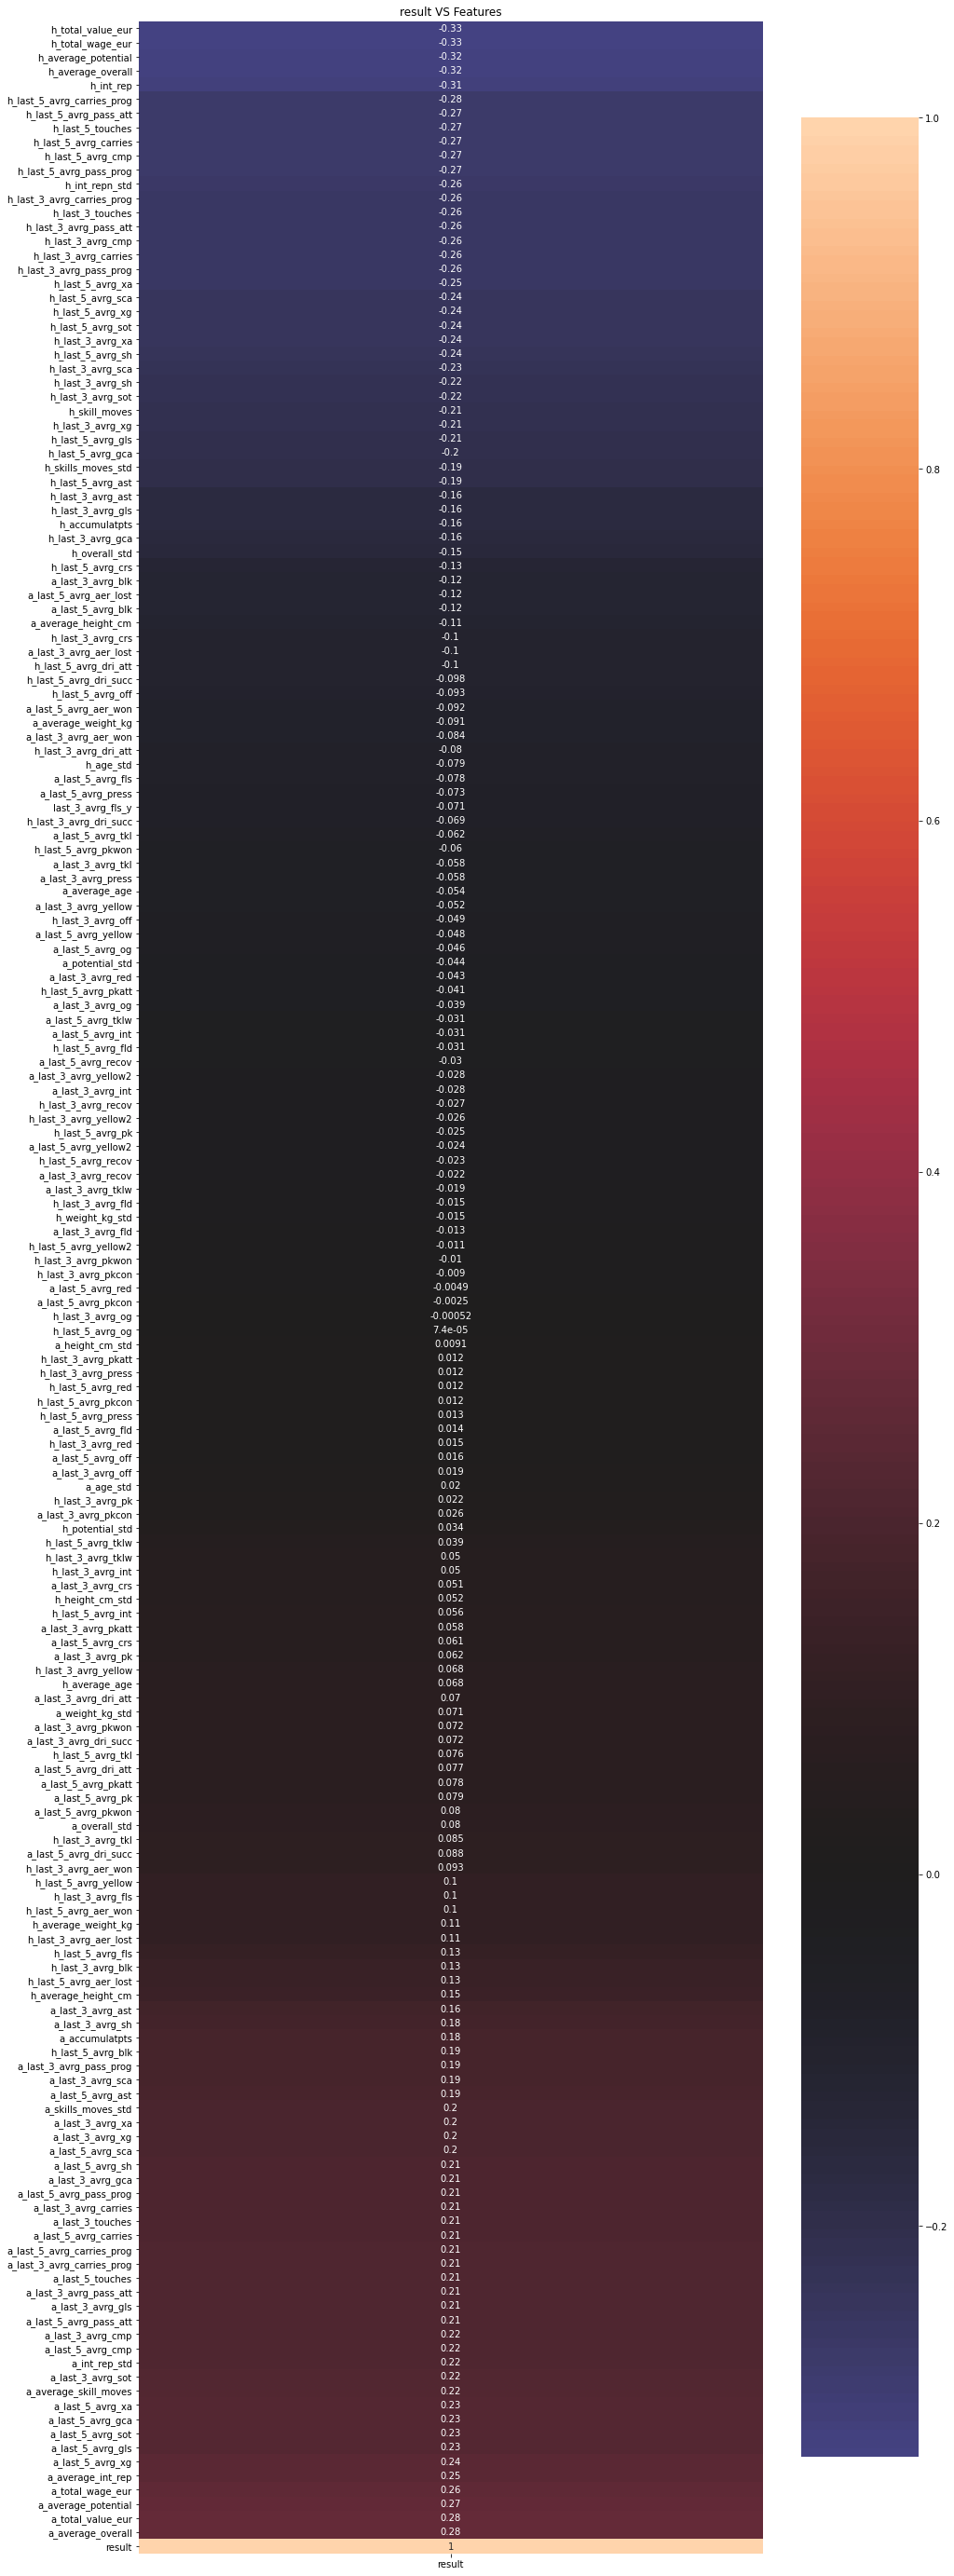

In [12]:
#Correlation between result and other features
plt.figure(figsize=(15,50))
sns.heatmap(train_1.corr()[['result']].sort_values('result'), annot=True,center =0)
plt.title('result VS Features')

There seems to have higher negative correlation features compared to positive correlation features. We will remove those not very correlated features and try to balance the same amount of features which are positively or negatively correlated.

In [13]:
#Let's remove features which are correlated between 0.22 and -0.22
train_corrs = train_1.corrwith(train['result'])
train_corrs_index = train_corrs[(train_corrs < 0.21) & (train_corrs > -0.22)].index

In [14]:
train_2 = train_1.drop(columns = train_corrs_index)

In [15]:
train_corrs_index.values

array(['h_last_5_avrg_gls', 'h_last_5_avrg_ast', 'h_last_5_avrg_pk',
       'h_last_5_avrg_pkatt', 'h_last_5_avrg_yellow', 'h_last_5_avrg_red',
       'h_last_5_avrg_press', 'h_last_5_avrg_tkl', 'h_last_5_avrg_int',
       'h_last_5_avrg_blk', 'h_last_5_avrg_gca', 'h_last_5_avrg_dri_succ',
       'h_last_5_avrg_dri_att', 'h_last_5_avrg_yellow2',
       'h_last_5_avrg_fls', 'h_last_5_avrg_fld', 'h_last_5_avrg_off',
       'h_last_5_avrg_crs', 'h_last_5_avrg_tklw', 'h_last_5_avrg_pkwon',
       'h_last_5_avrg_pkcon', 'h_last_5_avrg_og', 'h_last_5_avrg_recov',
       'h_last_5_avrg_aer_won', 'h_last_5_avrg_aer_lost',
       'h_last_3_avrg_gls', 'h_last_3_avrg_ast', 'h_last_3_avrg_pk',
       'h_last_3_avrg_pkatt', 'h_last_3_avrg_yellow', 'h_last_3_avrg_red',
       'h_last_3_avrg_press', 'h_last_3_avrg_tkl', 'h_last_3_avrg_int',
       'h_last_3_avrg_blk', 'h_last_3_avrg_xg', 'h_last_3_avrg_gca',
       'h_last_3_avrg_dri_succ', 'h_last_3_avrg_dri_att',
       'h_last_3_avrg_yellow2', 'h_

Text(0.5, 1.0, 'result VS Features')

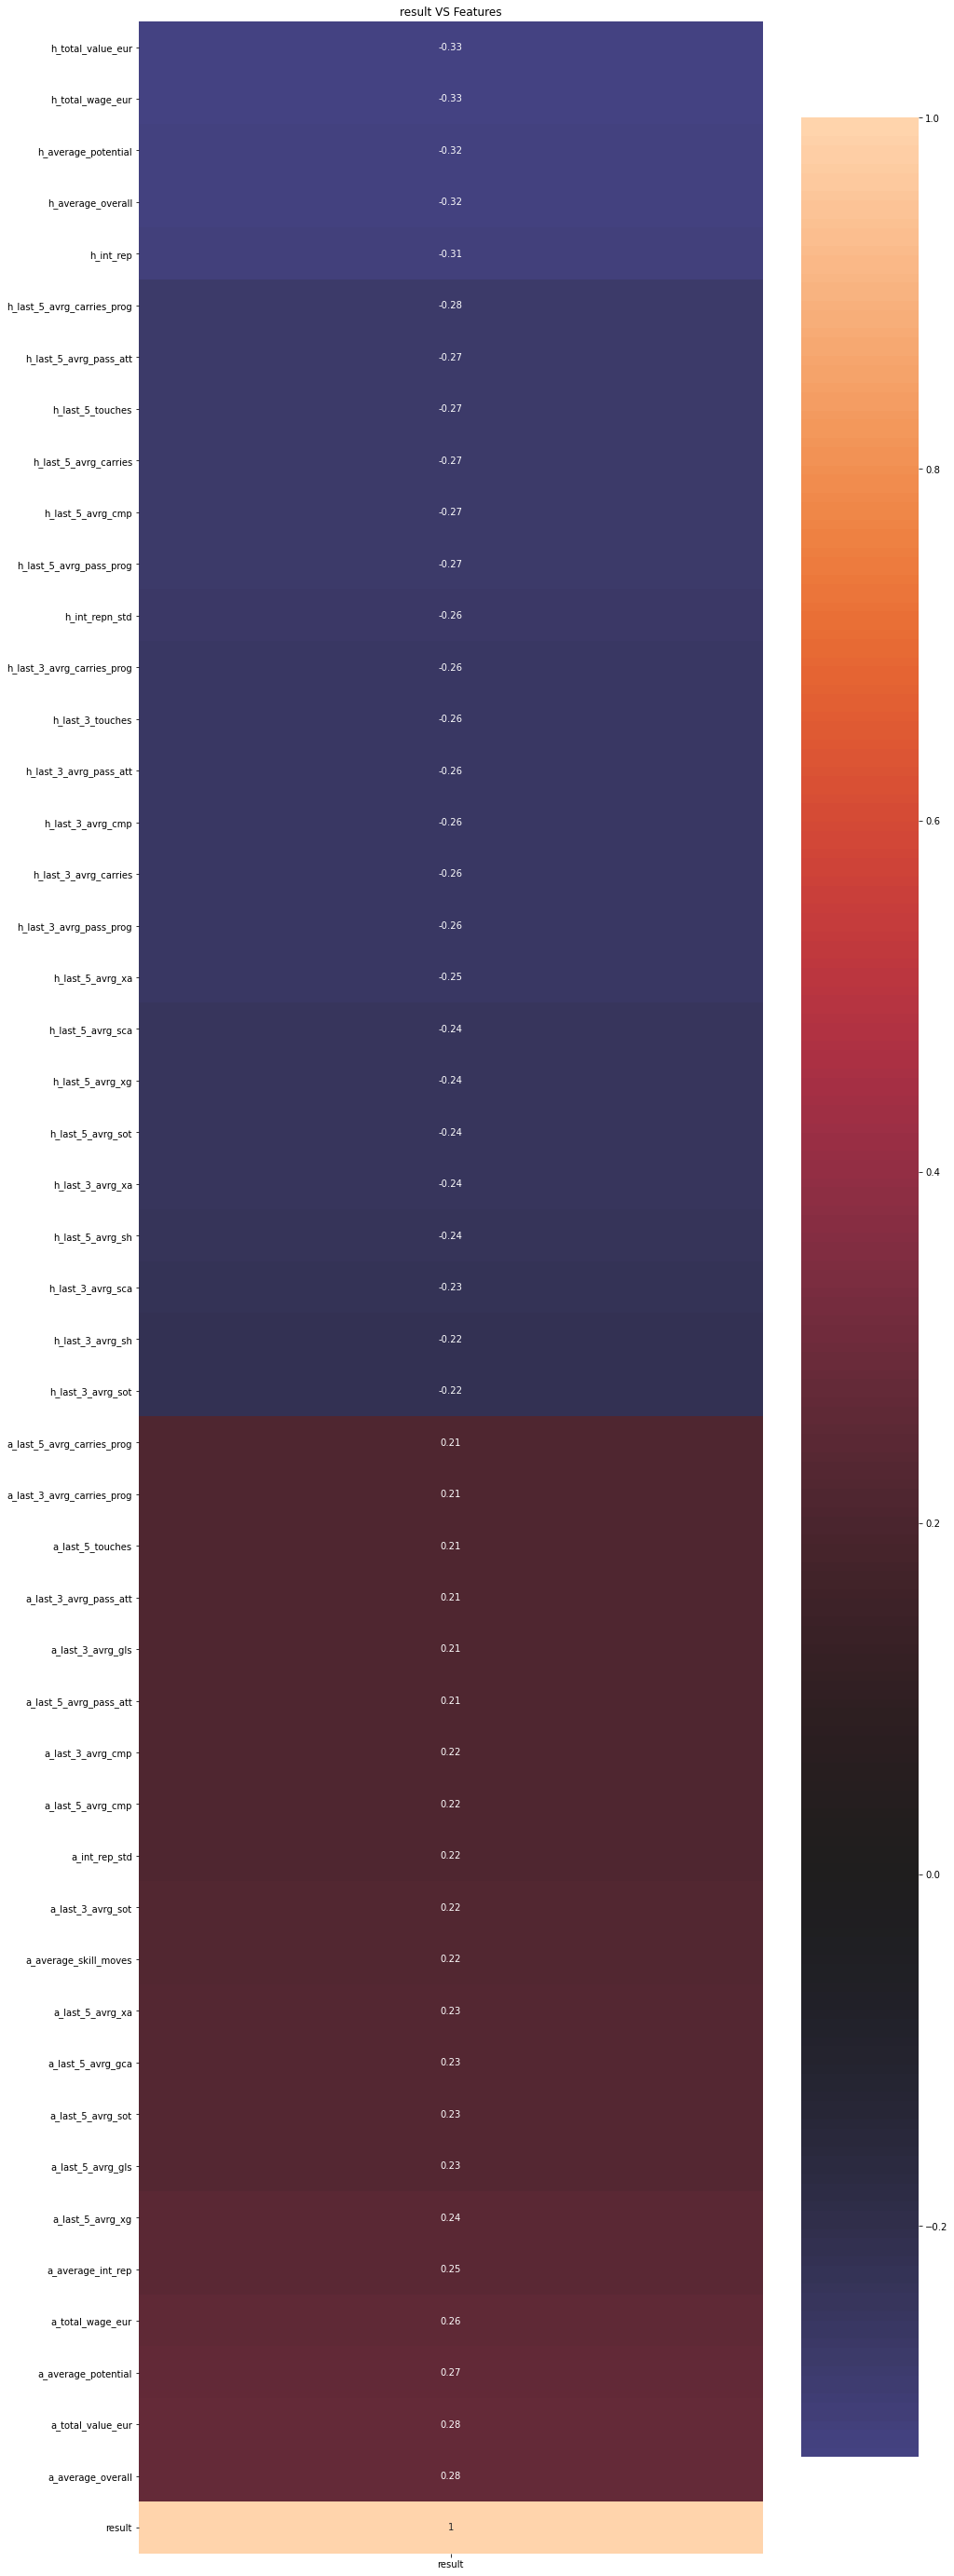

In [16]:
#Restudying the heatmap of the correlation between result and remaining features
#Correlation between result and other features
plt.figure(figsize=(15,50))
sns.heatmap(train_2.corr()[['result']].sort_values('result'), annot=True,center =0)
plt.title('result VS Features')

In [17]:
train_2.shape

(1307, 54)

In [18]:
train_2.columns

Index(['date', 'match', 'home', 'stadium', 'h_last_5_avrg_sh',
       'h_last_5_avrg_sot', 'h_last_5_touches', 'h_last_5_avrg_xg',
       'h_last_5_avrg_xa', 'h_last_5_avrg_sca', 'h_last_5_avrg_cmp',
       'h_last_5_avrg_pass_att', 'h_last_5_avrg_pass_prog',
       'h_last_5_avrg_carries', 'h_last_5_avrg_carries_prog',
       'h_last_3_avrg_sh', 'h_last_3_avrg_sot', 'h_last_3_touches',
       'h_last_3_avrg_xa', 'h_last_3_avrg_sca', 'h_last_3_avrg_cmp',
       'h_last_3_avrg_pass_att', 'h_last_3_avrg_pass_prog',
       'h_last_3_avrg_carries', 'h_last_3_avrg_carries_prog', 'away',
       'a_last_5_avrg_gls', 'a_last_5_avrg_sot', 'a_last_5_touches',
       'a_last_5_avrg_xg', 'a_last_5_avrg_xa', 'a_last_5_avrg_gca',
       'a_last_5_avrg_cmp', 'a_last_5_avrg_pass_att',
       'a_last_5_avrg_carries_prog', 'a_last_3_avrg_gls', 'a_last_3_avrg_sot',
       'a_last_3_avrg_cmp', 'a_last_3_avrg_pass_att',
       'a_last_3_avrg_carries_prog', 'result', 'h_total_value_eur',
       'h_total_wag

In [19]:
#Dropping target feature
train_3 = train_2.drop(columns = ['result'])

In [20]:
#Checking shape before split
train_3.shape

(1307, 53)

# Modeling

Here we will start our modeling process. We will start by splitting the dataset into Train set and Test set.

## Train Test Split

In [21]:
X = train_2[train_3.columns]
y = train_2['result']

In [22]:
X.shape

(1307, 53)

In [88]:
X.columns

Index(['date', 'match', 'home', 'stadium', 'h_last_5_avrg_sh',
       'h_last_5_avrg_sot', 'h_last_5_touches', 'h_last_5_avrg_xg',
       'h_last_5_avrg_xa', 'h_last_5_avrg_sca', 'h_last_5_avrg_cmp',
       'h_last_5_avrg_pass_att', 'h_last_5_avrg_pass_prog',
       'h_last_5_avrg_carries', 'h_last_5_avrg_carries_prog',
       'h_last_3_avrg_sh', 'h_last_3_avrg_sot', 'h_last_3_touches',
       'h_last_3_avrg_xa', 'h_last_3_avrg_sca', 'h_last_3_avrg_cmp',
       'h_last_3_avrg_pass_att', 'h_last_3_avrg_pass_prog',
       'h_last_3_avrg_carries', 'h_last_3_avrg_carries_prog', 'away',
       'a_last_5_avrg_gls', 'a_last_5_avrg_sot', 'a_last_5_touches',
       'a_last_5_avrg_xg', 'a_last_5_avrg_xa', 'a_last_5_avrg_gca',
       'a_last_5_avrg_cmp', 'a_last_5_avrg_pass_att',
       'a_last_5_avrg_carries_prog', 'a_last_3_avrg_gls', 'a_last_3_avrg_sot',
       'a_last_3_avrg_cmp', 'a_last_3_avrg_pass_att',
       'a_last_3_avrg_carries_prog', 'h_total_value_eur', 'h_total_wage_eur',
       'h

In [23]:
#Split the dataset, we will split them in order
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=False)

In [24]:
X_train_full.head()

,date,match,home,stadium,h_last_5_avrg_sh,h_last_5_avrg_sot,h_last_5_touches,h_last_5_avrg_xg,h_last_5_avrg_xa,h_last_5_avrg_sca,h_last_5_avrg_cmp,h_last_5_avrg_pass_att,h_last_5_avrg_pass_prog,h_last_5_avrg_carries,h_last_5_avrg_carries_prog,h_last_3_avrg_sh,h_last_3_avrg_sot,h_last_3_touches,h_last_3_avrg_xa,h_last_3_avrg_sca,h_last_3_avrg_cmp,h_last_3_avrg_pass_att,h_last_3_avrg_pass_prog,h_last_3_avrg_carries,h_last_3_avrg_carries_prog,away,a_last_5_avrg_gls,a_last_5_avrg_sot,a_last_5_touches,a_last_5_avrg_xg,a_last_5_avrg_xa,a_last_5_avrg_gca,a_last_5_avrg_cmp,a_last_5_avrg_pass_att,a_last_5_avrg_carries_prog,a_last_3_avrg_gls,a_last_3_avrg_sot,a_last_3_avrg_cmp,a_last_3_avrg_pass_att,a_last_3_avrg_carries_prog,h_total_value_eur,h_total_wage_eur,h_average_overall,h_average_potential,h_int_rep,h_int_repn_std,a_total_value_eur,a_total_wage_eur,a_average_overall,a_average_potential,a_average_int_rep,a_average_skill_moves,a_int_rep_std
10,2017-08-19,Southampton_vs_West_Ham_United,Southampton,"St. Mary's Stadium, Southampton",30.0,3.0,645.0,2.0,1.5,47.0,437.0,549.0,41.0,439.0,60.0,30.0,3.0,645.0,1.5,47.0,437.0,549.0,41.0,439.0,60.0,West Ham United,0.0,1.0,544.0,0.6,0.5,0.0,327.0,425.0,20.0,0.0,1.0,327.0,425.0,20.0,192000000,1330000,77.17,80.44,1.78,0.43,204200000,1646000,77.11,79.89,2.11,2.53,0.66
11,2017-08-19,Swansea_City_vs_Manchester_United,Swansea City,"Liberty Stadium, Swansea, Glamorgan",4.0,0.0,490.0,0.4,0.3,7.0,292.0,383.0,21.0,304.0,17.0,4.0,0.0,490.0,0.3,7.0,292.0,383.0,21.0,304.0,17.0,Manchester United,4.0,5.0,636.0,2.0,2.1,7.0,429.0,524.0,52.0,4.0,5.0,429.0,524.0,52.0,129600000,970000,75.53,78.41,1.76,0.56,491900000,2420000,82.29,84.88,2.71,2.94,0.69
12,2017-08-19,Stoke_City_vs_Arsenal,Stoke City,"Bet365 Stadium, Stoke-on-Trent",10.0,1.0,478.0,0.1,0.1,15.0,229.0,361.0,33.0,269.0,36.0,10.0,1.0,478.0,0.1,15.0,229.0,361.0,33.0,269.0,36.0,Arsenal,4.0,10.0,782.0,2.2,2.2,7.0,546.0,659.0,90.0,4.0,10.0,546.0,659.0,90.0,173000000,1010000,77.31,80.19,2.00,0.37,434500000,2245000,81.11,83.94,2.72,2.78,0.96
13,2017-08-19,Burnley_vs_West_Bromwich_Albion,Burnley,"Turf Moor, Burnley",10.0,5.0,447.0,0.8,0.6,16.0,248.0,344.0,23.0,235.0,23.0,10.0,5.0,447.0,0.6,16.0,248.0,344.0,23.0,235.0,23.0,West Bromwich Albion,1.0,6.0,399.0,1.1,0.9,2.0,188.0,294.0,21.0,1.0,6.0,188.0,294.0,21.0,103475000,810000,74.29,76.06,1.18,0.39,128550000,1060000,75.50,77.67,1.78,2.50,0.55
14,2017-08-19,Bournemouth_vs_Watford,Bournemouth,"Vitality Stadium, Bournemouth",9.0,2.0,739.0,0.4,0.3,14.0,530.0,642.0,41.0,589.0,55.0,9.0,2.0,739.0,0.3,14.0,530.0,642.0,41.0,589.0,55.0,Watford,3.0,5.0,563.0,1.9,0.3,3.0,301.0,450.0,20.0,3.0,5.0,301.0,450.0,20.0,115200000,970000,74.56,78.33,1.17,0.51,142700000,870000,76.65,78.94,1.65,2.65,0.49


In [25]:
X_test_full.head()

,date,match,home,stadium,h_last_5_avrg_sh,h_last_5_avrg_sot,h_last_5_touches,h_last_5_avrg_xg,h_last_5_avrg_xa,h_last_5_avrg_sca,h_last_5_avrg_cmp,h_last_5_avrg_pass_att,h_last_5_avrg_pass_prog,h_last_5_avrg_carries,h_last_5_avrg_carries_prog,h_last_3_avrg_sh,h_last_3_avrg_sot,h_last_3_touches,h_last_3_avrg_xa,h_last_3_avrg_sca,h_last_3_avrg_cmp,h_last_3_avrg_pass_att,h_last_3_avrg_pass_prog,h_last_3_avrg_carries,h_last_3_avrg_carries_prog,away,a_last_5_avrg_gls,a_last_5_avrg_sot,a_last_5_touches,a_last_5_avrg_xg,a_last_5_avrg_xa,a_last_5_avrg_gca,a_last_5_avrg_cmp,a_last_5_avrg_pass_att,a_last_5_avrg_carries_prog,a_last_3_avrg_gls,a_last_3_avrg_sot,a_last_3_avrg_cmp,a_last_3_avrg_pass_att,a_last_3_avrg_carries_prog,h_total_value_eur,h_total_wage_eur,h_average_overall,h_average_potential,h_int_rep,h_int_repn_std,a_total_value_eur,a_total_wage_eur,a_average_overall,a_average_potential,a_average_int_rep,a_average_skill_moves,a_int_rep_std
1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,Wolverhampton Wanderers,Molineux Stadium Wolverhampton,10.6,3.0,573.0,0.90,0.58,17.2,368.0,461.2,23.4,360.2,39.6,10.666667,3.333333,600.333333,0.400000,15.000000,402.666667,497.333333,29.666667,392.666667,47.000000,Newcastle United,1.2,2.2,507.0,1.04,0.66,2.6,291.6,396.8,27.4,1.333333,2.666667,291.666667,399.666667,28.000000,188475000,1042000,75.53,81.35,1.53,0.80,160300000,655000,76.06,78.67,1.33,2.78,0.49
1194,2020-10-25,Southampton_vs_Everton,Southampton,St. Mary's Stadium Southampton,10.6,4.8,660.8,1.30,0.74,14.4,413.4,542.6,33.4,365.6,43.4,10.333333,4.666667,661.000000,0.866667,12.333333,407.000000,538.000000,32.000000,365.333333,40.000000,Everton,2.8,5.4,690.2,1.98,1.30,5.0,478.0,569.6,38.0,2.666667,5.000000,391.666667,481.333333,30.666667,133750000,718000,74.29,77.76,1.35,0.49,254500000,1333000,79.00,81.06,1.82,3.12,0.88
1195,2020-10-25,Arsenal_vs_Leicester_City,Arsenal,Emirates Stadium London,8.0,3.8,691.6,1.14,0.78,12.8,503.4,593.8,27.0,450.6,45.4,7.000000,3.666667,638.666667,0.533333,10.666667,443.333333,535.000000,19.666667,394.000000,43.000000,Leicester City,2.2,4.0,649.6,1.38,0.32,4.6,439.2,544.4,44.4,1.666667,3.000000,381.000000,487.666667,43.000000,285300000,1287000,78.76,83.82,1.94,1.09,249400000,1295000,78.59,81.53,1.47,3.06,0.62
1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,Burnley,Turf Moor Burnley,12.0,3.0,556.0,1.22,0.80,17.8,323.8,456.0,25.4,285.0,27.4,9.666667,3.000000,593.333333,0.366667,13.000000,352.000000,501.666667,26.666667,310.333333,25.666667,Tottenham Hotspur,3.0,7.0,696.4,2.12,1.42,5.6,491.8,587.0,42.4,3.333333,8.000000,545.666667,631.000000,51.000000,137700000,776000,75.53,77.24,1.12,0.33,451500000,1876000,81.94,84.28,2.06,3.06,0.87
1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,Brighton & Hove Albion,The American Express Community Stadium Brighto...,14.0,3.4,660.2,1.52,0.94,22.6,459.4,559.4,34.8,457.6,52.6,15.000000,3.000000,694.333333,0.933333,24.333333,490.000000,589.666667,39.666667,488.666667,58.666667,West Bromwich Albion,1.0,3.4,495.0,0.52,0.34,1.4,269.6,367.4,26.4,1.000000,4.000000,274.666667,381.333333,29.666667,124025000,693000,74.18,78.76,1.29,0.59,70000000,786000,73.00,76.56,1.25,2.81,0.58


In [26]:
#Drop these columns as they are unable to train the model
X_train = X_train_full.drop(columns = ['date','match','home','away','stadium'])
X_test = X_test_full.drop(columns = ['date','match','home','away','stadium'])

In [27]:
#As the ranges of the features are differnet, lets normalize
mm = MinMaxScaler()
Xmm_train = mm.fit_transform(X_train)
Xmm_test = mm.transform(X_test)

In [28]:
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)

In [29]:
Xmm_train.shape

(1176, 48)

In [30]:
#baseline score is 0.455
y_train.value_counts(normalize=True)

0    0.455782
2    0.315476
1    0.228741
Name: result, dtype: float64

## Logistic Regression

We will be training our model using logistic regression in this section. We will grid search and look for the best params.

In [31]:
#Gridsearch to look for best params
lr = LogisticRegression(random_state=42)
lr_params = {
    'C': np.linspace(0.1,1,5)
}
#Gridsearch and fit the model
gs_lr = GridSearchCV(lr, param_grid = lr_params, cv=5,n_jobs=-1, verbose=1,scoring='f1_micro')
gs_lr.fit(Xmm_train, y_train)

#Getting the best params
gs_lr.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.3s finished


LogisticRegression(C=0.325, random_state=42)

In [32]:
#Fit the model best on best params
lr = LogisticRegression(C=0.55, random_state=42)
lr.fit(Xmm_train,y_train)

LogisticRegression(C=0.55, random_state=42)

In [33]:
print(lr.score(Xmm_train,y_train))
print(lr.score(Xmm_test,y_test))

0.564625850340136
0.5267175572519084


There is a overfitting of data as the train score is 0.04 higher than test score.

In [34]:
#Looking at the coefs for logistic regression model
lr_coeff = np.exp(lr.coef_[1])
imp_lr = pd.DataFrame(lr_coeff, X_train.columns, columns=['coef']).sort_values(by='coef',ascending=False)
imp_lr.head(20)

,coef
h_last_3_avrg_sot,1.583040
a_int_rep_std,1.420010
a_last_5_avrg_xg,1.391317
h_last_5_avrg_sca,1.345433
h_last_5_avrg_sot,1.338670
h_average_potential,1.329825
a_last_3_avrg_gls,1.274080
h_int_repn_std,1.257442
h_average_overall,1.207342
a_last_3_avrg_pass_att,1.197826


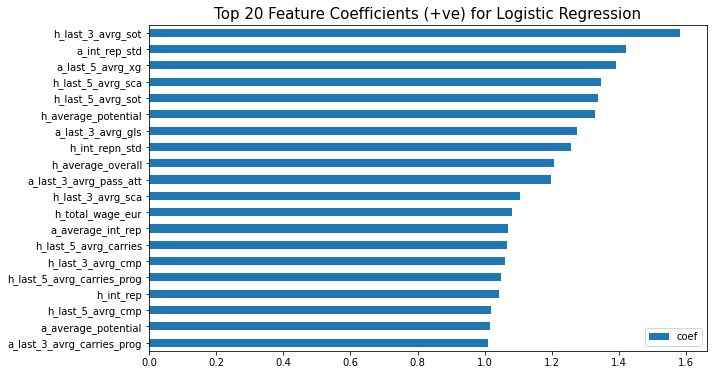

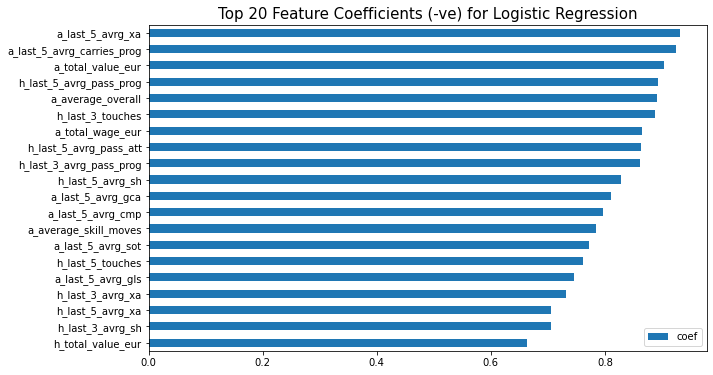

In [35]:
# Plotting top 20 +ve features in bar chart
imp_lr.head(20).plot(kind='barh', figsize=(10,6))
plt.title('Top 20 Feature Coefficients (+ve) for Logistic Regression', fontsize=15)
plt.gca().invert_yaxis()
plt.legend(loc=4);
# Plotting top 20 -ve features in bar chart
imp_lr.tail(20).plot(kind='barh', figsize=(10,6))
plt.title('Top 20 Feature Coefficients (-ve) for Logistic Regression', fontsize=15)
plt.gca().invert_yaxis()
plt.legend(loc=4);

In the top positive, most of the top features are past matches performance. There are shots on target, expected goal and scoring chance. Some team stats are inside as well, international rep std and average potential.

For the negative coefficients, there are a mixture of features as well. Similarly to top positives, most of them are past matches performance. Average expected assist, carries progressive, passing progressive and touches. 

### Test Data Predictions Using Logistic Regression 

In [36]:
lr_preds = lr.predict(Xmm_test)
lr_preds_df = pd.DataFrame(lr_preds)
lr_matches_df  = pd.merge(X_test_full[['date','match','home','away']].reset_index(),lr_preds_df,left_index=True,right_index=True)
lr_matches_df.head()

,index,date,match,home,away,0
0,1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,Wolverhampton Wanderers,Newcastle United,0
1,1194,2020-10-25,Southampton_vs_Everton,Southampton,Everton,2
2,1195,2020-10-25,Arsenal_vs_Leicester_City,Arsenal,Leicester City,0
3,1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,Burnley,Tottenham Hotspur,2
4,1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,Brighton & Hove Albion,West Bromwich Albion,0


In [37]:
lr_proba = lr.predict_proba(Xmm_test)
df_lr_prob = pd.DataFrame(lr_proba)
lr_matches_prob = pd.merge(X_test_full[['date','home','away','h_average_overall','a_average_overall']].reset_index(),
                           df_lr_prob,left_index=True,right_index=True)
lr_matches_prob.head()

,index,date,home,away,h_average_overall,a_average_overall,0,1,2
0,1193,2020-10-25,Wolverhampton Wanderers,Newcastle United,75.53,76.06,0.453074,0.307281,0.239645
1,1194,2020-10-25,Southampton,Everton,74.29,79.00,0.258388,0.192575,0.549037
2,1195,2020-10-25,Arsenal,Leicester City,78.76,78.59,0.513783,0.252503,0.233714
3,1196,2020-10-26,Burnley,Tottenham Hotspur,75.53,81.94,0.101615,0.126634,0.771751
4,1197,2020-10-26,Brighton & Hove Albion,West Bromwich Albion,74.18,73.00,0.587734,0.198056,0.214209


Using logistic regression to predict on the test data, it seems that the predicted results are either 0 or 2. It is unable to predict draw games. The first game, which is Wolverhampton_Wanderers Vs Newcastle United is actually a draw game. 

In terms of probability, as Wolverhampton Wanderers have a better probability. It has a slightly better average overall compared to Newcastle but the probability is around 0.22 difference. I guess home advantage might play a part. However, the h_average_overall is lower than the a_average_overall. Well, other factors might play a part too.

In [38]:
# Initialize empty list to store all the scores and corresponding model names
model_name = []
model_scores = []
model_var = []
model_test_scores = []

# Append to the lists
model_name.append('Logistic Regression')
model_scores.append(lr.score(Xmm_train, y_train))
model_var.append(lr)
model_test_scores.append(lr.score(Xmm_test,y_test))

## Random Forest Classification

We will be using Random Forest Classification in this section.

In [39]:
rf = RandomForestClassifier(random_state=42)
#Include params to test
rf_params = {
    'n_estimators': [80, 100, 120],
    'max_depth': [3, 5],
    'min_samples_leaf': [2, 4],
    'min_samples_split' : [2, 4]
}
#Grid-Searching
gs_rf = GridSearchCV(rf, param_grid = rf_params, cv=5,n_jobs=-1,verbose=1,scoring='f1_micro')
#Fitting the model and getting the best estimator
gs_rf.fit(Xmm_train, y_train)
gs_rf.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.7s finished


RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=80,
                       random_state=42)

In [40]:
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=2,n_estimators=80, random_state=42)

In [41]:
rf.fit(Xmm_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=80,
                       random_state=42)

In [42]:
print(rf.score(Xmm_train,y_train))
print(rf.score(Xmm_test,y_test))

0.6181972789115646
0.5343511450381679


There is still an overfit of data using Random Forest Classification. However, the score is still higher than the baseline.

In [43]:
#Random Forest Features ranked by importanc
rf_impt_feature = rf.feature_importances_
rf_impt_df = pd.DataFrame(index = X_test.columns, data = rf_impt_feature, columns = ['Importance']).sort_values('Importance',ascending=False)
rf_impt_df.head()

,Importance
h_total_value_eur,0.051729
h_average_overall,0.050853
h_average_potential,0.041371
h_total_wage_eur,0.041093
a_average_overall,0.039969


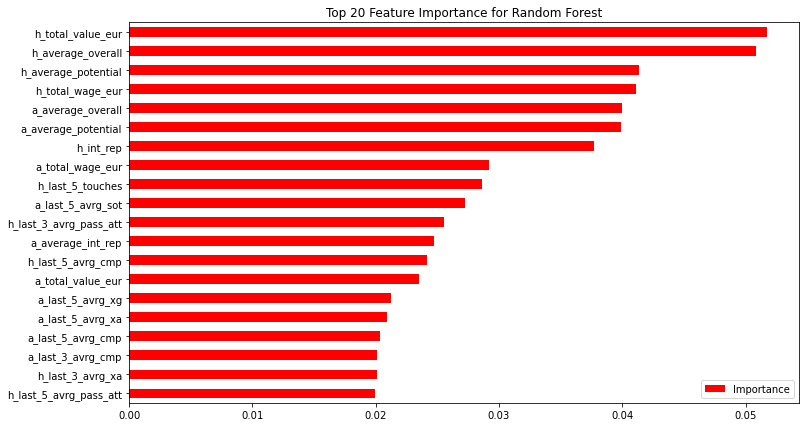

In [44]:
rf_impt_df.head(20).plot(kind='barh',figsize=(12,7),color='red',label=rf_impt_df.columns[:20])
plt.title('Top 20 Feature Importance for Random Forest')
plt.gca().invert_yaxis()
plt.legend(loc=4);

Using random forest, the top 5 important features are average potential of both teams, the wages and the overall. The past matches stats only appear from the 9th important stats onwards. I think this model is heavily influenced by team stats.

### Test Data Predictions with Random Forest

In [45]:
#Comparing predictions with matches
rf_preds = rf.predict(Xmm_test)
rf_preds_df = pd.DataFrame(rf_preds)
rf_matches_df  = pd.merge(X_test_full[['date','match','home','away','h_average_potential','a_average_potential']].reset_index(),rf_preds_df,left_index=True,right_index=True)
rf_matches_df.head()

,index,date,match,home,away,h_average_potential,a_average_potential,0
0,1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,Wolverhampton Wanderers,Newcastle United,81.35,78.67,0
1,1194,2020-10-25,Southampton_vs_Everton,Southampton,Everton,77.76,81.06,2
2,1195,2020-10-25,Arsenal_vs_Leicester_City,Arsenal,Leicester City,83.82,81.53,0
3,1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,Burnley,Tottenham Hotspur,77.24,84.28,2
4,1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,Brighton & Hove Albion,West Bromwich Albion,78.76,76.56,0


In [46]:
#Comparing probability of winning with matches
rf_proba = rf.predict_proba(Xmm_test)
df_rf_prob = pd.DataFrame(rf_proba)
rf_prob_pred = pd.merge(X_test_full[['date','match','h_average_potential','a_average_potential']].reset_index(),df_rf_prob,left_index=True,right_index=True)
rf_prob_pred.head()

,index,date,match,h_average_potential,a_average_potential,0,1,2
0,1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,81.35,78.67,0.419469,0.295157,0.285374
1,1194,2020-10-25,Southampton_vs_Everton,77.76,81.06,0.274531,0.177773,0.547696
2,1195,2020-10-25,Arsenal_vs_Leicester_City,83.82,81.53,0.493063,0.274415,0.232522
3,1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,77.24,84.28,0.135701,0.105111,0.759188
4,1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,78.76,76.56,0.485534,0.200464,0.314003


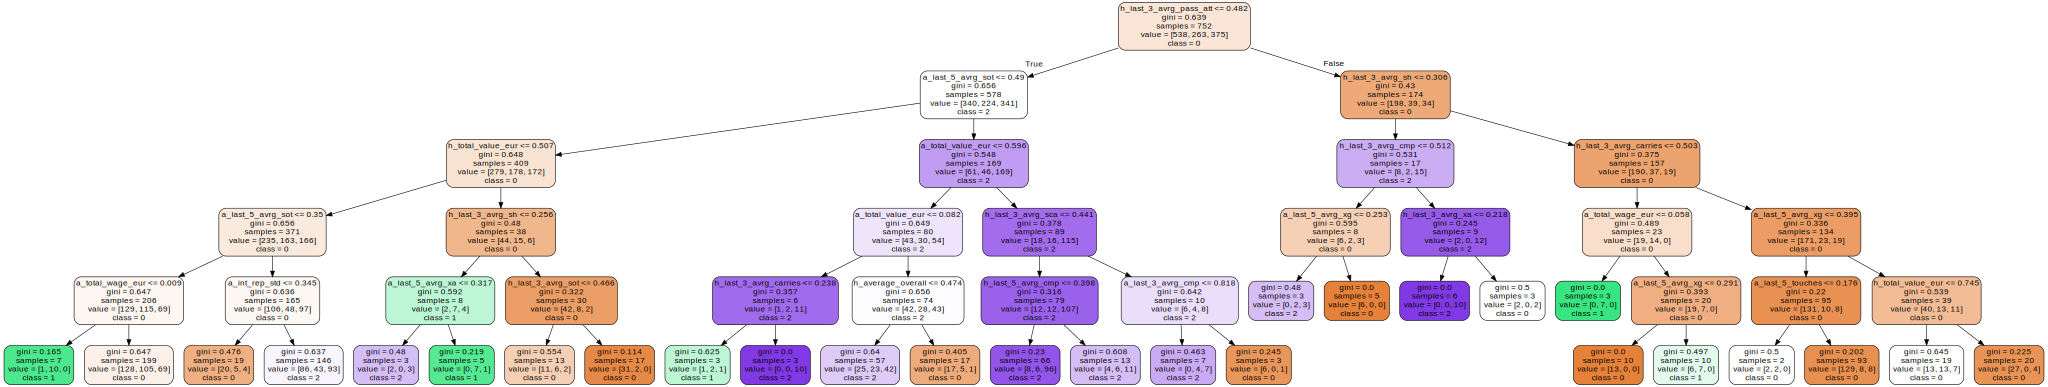

In [47]:
# DOT data
dotfile = open("images/tree.dot", 'w')
dot_data = export_graphviz(rf.estimators_[1], out_file=None, 
                                feature_names= X_train.columns,  
                                class_names=['0','1','2'],
                                rounded=True, proportion=False,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Using random forest classifier, it seems that it is unable to predict draw games as well, because the predictions are 0 or 2. An example will be the same match, Wolverhampton Wanders vs Newcastle United. The game is a drawn game. 

For the probability portion, using the top 2 important feature for random forest classifier. Wolverhampton Wanderers have a higher average potential of 0.3. That might be the reason behind Wolverhampton Wanderers higher probability.

Despite the importance feature, in the random forest tree breakdown, the features taken into considerations are the past matches performance. The first features did appear in the top 20 important features too.

In [48]:
# Append to the lists
model_name.append('Random Forest')
model_scores.append(rf.score(Xmm_train, y_train))
model_var.append(rf)
model_test_scores.append(rf.score(Xmm_test,y_test))

## ExtraTrees Classifier

We will be using Extra Trees Classifier in this section.

In [49]:
et = ExtraTreesClassifier(random_state=42)
# Including hyperparameters
et_params = {
    'n_estimators': [80, 100, 120],
    'max_depth': [3, 5],
    'min_samples_leaf': [2, 4],
    'min_samples_split' : [2, 4],
}
#Grid-Searching
gs_et = GridSearchCV(et, param_grid = et_params, cv=5,n_jobs=-1,verbose=1,scoring='f1_micro')
gs_et.fit(Xmm_train, y_train)
#Getting the best estimator
gs_et.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.5s finished


ExtraTreesClassifier(max_depth=5, min_samples_leaf=2, n_estimators=80,
                     random_state=42)

In [50]:
#Using the best parameters and fit the model
et = ExtraTreesClassifier(max_depth=5, min_samples_leaf=2, n_estimators=80,random_state=42)
et.fit(Xmm_train, y_train)

ExtraTreesClassifier(max_depth=5, min_samples_leaf=2, n_estimators=80,
                     random_state=42)

In [51]:
print(et.score(Xmm_train,y_train))
print(et.score(Xmm_test,y_test))

0.5705782312925171
0.5114503816793893


There is overfit in the data. However, the test score is better than the baseline score by 0.05, which is very little.

In [52]:
et_impt_feature = et.feature_importances_
et_impt_df = pd.DataFrame(index = X_test.columns, data = et_impt_feature, columns = ['Importance']).sort_values('Importance',ascending=False)
et_impt_df.head(10)

,Importance
h_average_potential,0.056212
a_total_value_eur,0.055565
h_total_wage_eur,0.050988
h_total_value_eur,0.047390
h_int_rep,0.046272
a_average_overall,0.045105
h_average_overall,0.039135
a_average_int_rep,0.036733
a_average_potential,0.036167
h_last_5_avrg_carries_prog,0.034363


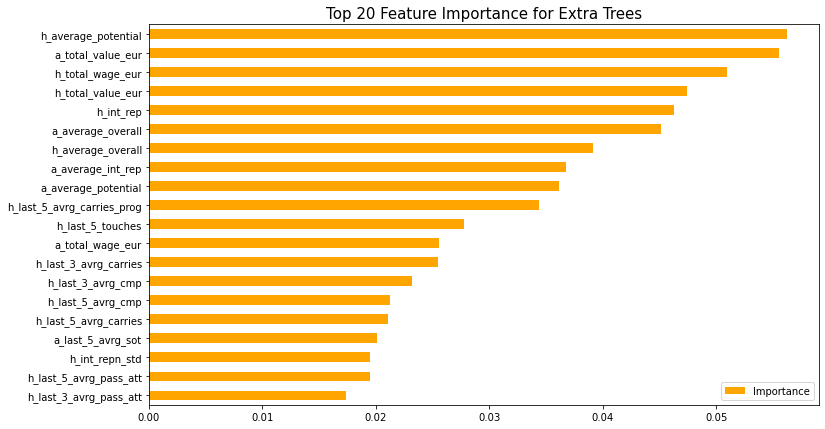

In [53]:
# Top 20 features
et_impt_df.head(20).plot(kind='barh', label=et_impt_df.columns, figsize=(12,7), color='orange')
plt.title('Top 20 Feature Importance for Extra Trees', fontsize=15)
plt.gca().invert_yaxis()
plt.legend(loc=4);

The extra trees top few important features are individual team stats features such as total wages, value, average potential, average overall. I guess this model is heavily influenced by team stats. 

### Test Data Predictions using Extra Trees

In [54]:
et_preds = et.predict(Xmm_test)
df_et_prob = pd.DataFrame(et_preds)
et_matches_prob = pd.merge(X_test_full[['date','match','home','away','h_total_value_eur','a_total_value_eur']].reset_index(),df_et_prob,left_index=True,right_index=True)
et_matches_prob.head()

,index,date,match,home,away,h_total_value_eur,a_total_value_eur,0
0,1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,Wolverhampton Wanderers,Newcastle United,188475000,160300000,0
1,1194,2020-10-25,Southampton_vs_Everton,Southampton,Everton,133750000,254500000,2
2,1195,2020-10-25,Arsenal_vs_Leicester_City,Arsenal,Leicester City,285300000,249400000,0
3,1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,Burnley,Tottenham Hotspur,137700000,451500000,2
4,1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,Brighton & Hove Albion,West Bromwich Albion,124025000,70000000,0


In [55]:
#Getting the probability result
et_proba = et.predict_proba(Xmm_test)
df_et_prob = pd.DataFrame(et_proba)

et_matches_prob = pd.merge(X_test_full[['date','match','home','away','h_total_value_eur','a_total_value_eur']].reset_index(),df_et_prob,left_index=True,right_index=True)
et_matches_prob.head()

,index,date,match,home,away,h_total_value_eur,a_total_value_eur,0,1,2
0,1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,Wolverhampton Wanderers,Newcastle United,188475000,160300000,0.442691,0.276628,0.280681
1,1194,2020-10-25,Southampton_vs_Everton,Southampton,Everton,133750000,254500000,0.324959,0.204896,0.470145
2,1195,2020-10-25,Arsenal_vs_Leicester_City,Arsenal,Leicester City,285300000,249400000,0.491860,0.249812,0.258327
3,1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,Burnley,Tottenham Hotspur,137700000,451500000,0.217323,0.173941,0.608736
4,1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,Brighton & Hove Albion,West Bromwich Albion,124025000,70000000,0.481850,0.229739,0.288411


It seems that the extra trees are unable to predict the draw games as well. It can be seen for the Wolverhampton Wanderers match with Newcastle. 

In terms of probability, Wolverhampton Wanderers have a higher probability of winning. As total value of each team are in the important features, the probability and predictions are affected by them. 

In [56]:
# Append to the lists
model_name.append('Extra Trees')
model_scores.append(et.score(Xmm_train, y_train))
model_var.append(et)
model_test_scores.append(et.score(Xmm_test,y_test))

## AdaBoost Classifier

In this section, we will use the Ada Boost Classifier.

In [57]:
ada =  AdaBoostClassifier(random_state=42)

# Hyperparameters
ada_params = {
    'n_estimators': [20, 30, 40, 50],
    'learning_rate': [0.8, 0.9, 1]
}

gs_ada = GridSearchCV(ada, param_grid = ada_params, cv=5, n_jobs=-1,verbose=1,scoring='f1_micro')
gs_ada.fit(Xmm_train, y_train)
gs_ada.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  60 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished


AdaBoostClassifier(learning_rate=0.9, n_estimators=20, random_state=42)

In [58]:
ada = AdaBoostClassifier(learning_rate=0.8, n_estimators=30, random_state=42)
ada.fit(Xmm_train, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=30, random_state=42)

In [59]:
print(ada.score(Xmm_train,y_train))
print(ada.score(Xmm_test,y_test))

0.6062925170068028
0.4961832061068702


There is a large overfit in the data. However, the test data is only slightly better than baseline score.

In [60]:
ada_impt_feature = ada.feature_importances_
ada_impt_df = pd.DataFrame(index = X_test.columns, data = ada_impt_feature, columns = ['Importance']).sort_values('Importance',ascending=False)
ada_impt_df.head(10)

,Importance
a_last_5_avrg_pass_att,0.066667
h_last_5_avrg_xg,0.066667
a_last_5_avrg_xa,0.066667
a_last_3_avrg_sot,0.066667
a_last_5_avrg_gls,0.066667
a_last_3_avrg_carries_prog,0.066667
h_last_5_avrg_carries_prog,0.066667
h_int_repn_std,0.066667
h_last_3_avrg_pass_att,0.066667
a_last_5_avrg_xg,0.033333


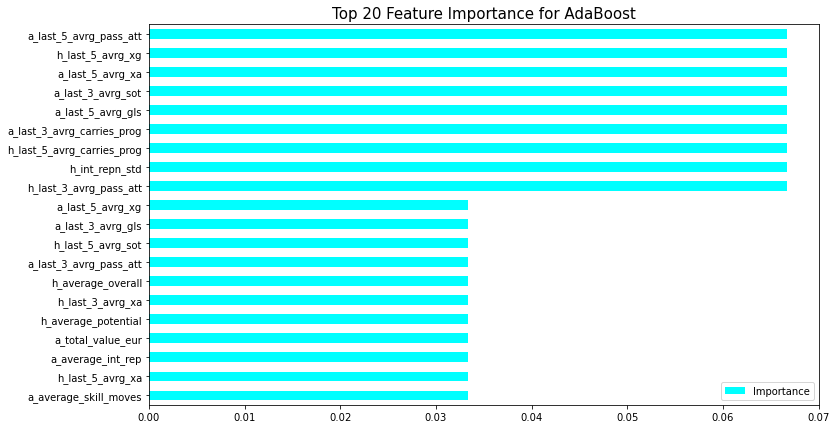

In [61]:
ada_impt_df.head(20).plot(kind='barh', label=ada_impt_df.columns[:20], figsize=(12,7), color='cyan')
plt.title('Top 20 Feature Importance for AdaBoost', fontsize=15)
plt.gca().invert_yaxis()

For Ada Boost Classifier, the model looked at more past matches performance for the predictions. The top 10 important features are past matches stats for both home and away. 


### Test Data Predictions using Ada Boost Classifier

In [62]:
ada_preds = ada.predict(Xmm_test)
df_ada_preds = pd.DataFrame(ada_preds)

ada_matches_preds = pd.merge(X_test_full[['date','match','home','away']].reset_index(),df_ada_preds,left_index=True,right_index=True)
ada_matches_preds.head()

,index,date,match,home,away,0
0,1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,Wolverhampton Wanderers,Newcastle United,0
1,1194,2020-10-25,Southampton_vs_Everton,Southampton,Everton,2
2,1195,2020-10-25,Arsenal_vs_Leicester_City,Arsenal,Leicester City,0
3,1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,Burnley,Tottenham Hotspur,2
4,1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,Brighton & Hove Albion,West Bromwich Albion,0


In [63]:
ada_proba = ada.predict_proba(Xmm_test)
df_ada_prob = pd.DataFrame(ada_proba)

ada_matches_prob = pd.merge(X_test_full[['date','match','home','away']].reset_index(),df_ada_prob,left_index=True,right_index=True)
ada_matches_prob.head()

,index,date,match,home,away,0,1,2
0,1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,Wolverhampton Wanderers,Newcastle United,0.336620,0.335219,0.328161
1,1194,2020-10-25,Southampton_vs_Everton,Southampton,Everton,0.338379,0.323211,0.338410
2,1195,2020-10-25,Arsenal_vs_Leicester_City,Arsenal,Leicester City,0.357571,0.335295,0.307134
3,1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,Burnley,Tottenham Hotspur,0.323470,0.315912,0.360619
4,1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,Brighton & Hove Albion,West Bromwich Albion,0.348601,0.336143,0.315256


For Ada Boost Classifier, it manage to predict one draw game. 

However, the probability seems too balanced for each result. It is similar for every team. I think this is due to that the model is looking at past matches performance instead of individual team statistics as compared to the past few models we have built.

In [64]:
# Append to the lists
model_name.append('AdaBoost')
model_scores.append(ada.score(Xmm_train, y_train))
model_var.append(ada)
model_test_scores.append(ada.score(Xmm_test,y_test))

## Gradient Boost Classifier

In [65]:
gboost = GradientBoostingClassifier(random_state=42)
#Setting the params
gboost_params = {
    'n_estimators': [80, 100, 120, 150],
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]}
    
#Grid searching    
gs_gboost = GridSearchCV(gboost, param_grid = gboost_params, cv=5,n_jobs=-1,verbose=1,scoring='f1_micro')
#Fit the model
gs_gboost.fit(Xmm_train, y_train)
#Getting the best params
gs_gboost.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   38.7s finished


GradientBoostingClassifier(max_depth=1, min_samples_leaf=2, n_estimators=80,
                           random_state=42)

In [66]:
gboost = GradientBoostingClassifier(max_depth=1, min_samples_leaf=2, random_state=42)
gboost.fit(Xmm_train, y_train)

GradientBoostingClassifier(max_depth=1, min_samples_leaf=2, random_state=42)

In [67]:
print(gboost.score(Xmm_train,y_train))
print(gboost.score(Xmm_test,y_test))

0.6011904761904762
0.4961832061068702


The data tend to be overfitted

In [68]:
imp_gboost = pd.DataFrame(gboost.feature_importances_,index=X_test.columns,columns=['importance']).sort_values(by='importance', ascending=False)
imp_gboost.head(10)

,importance
h_int_repn_std,0.094161
a_average_overall,0.079486
h_average_potential,0.075936
h_int_rep,0.071717
h_last_3_avrg_xa,0.066380
a_last_3_avrg_sot,0.063083
h_average_overall,0.062097
h_last_5_avrg_pass_prog,0.059458
a_average_potential,0.044670
a_total_wage_eur,0.044244


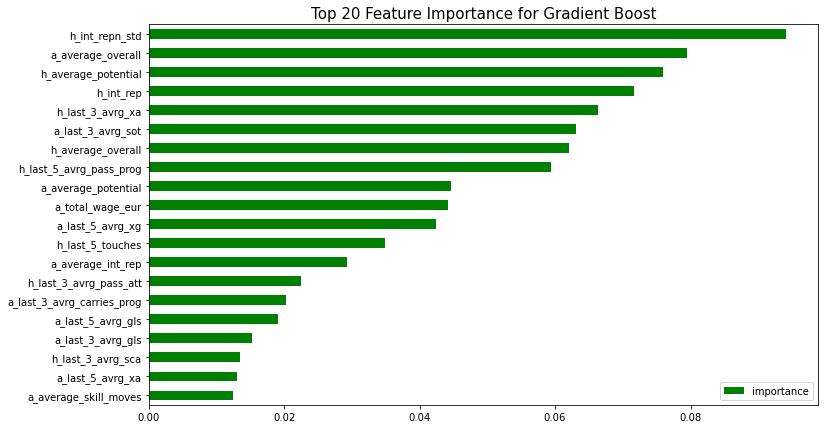

In [69]:
# Plot in bar chart
imp_gboost.head(20).plot(kind='barh', label=imp_gboost.columns[:20], figsize=(12,7), color='green')
plt.title('Top 20 Feature Importance for Gradient Boost', fontsize=15)
plt.gca().invert_yaxis()
plt.legend(loc=4);

For gradient boost, the important features are mainly individual team stats. There are also a few past matches performance, but are not as important compared to the team stats.

### Test Data Predictions Using Gradient Boost Classifier

In [70]:
gboost_preds = gboost.predict(Xmm_test)
df_gboost_preds = pd.DataFrame(gboost_preds)

gboost_matches_prob = pd.merge(X_test_full[['date','match','home','away']].reset_index(),df_gboost_preds,left_index=True,right_index=True)
gboost_matches_prob.head()

,index,date,match,home,away,0
0,1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,Wolverhampton Wanderers,Newcastle United,0
1,1194,2020-10-25,Southampton_vs_Everton,Southampton,Everton,2
2,1195,2020-10-25,Arsenal_vs_Leicester_City,Arsenal,Leicester City,0
3,1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,Burnley,Tottenham Hotspur,2
4,1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,Brighton & Hove Albion,West Bromwich Albion,0


In [71]:
gboost_proba = gboost.predict_proba(Xmm_test)
df_gboost_prob = pd.DataFrame(gboost_proba)

gboost_matches_prob = pd.merge(X_test_full[['date','match','home','away']].reset_index(),df_gboost_prob,left_index=True,right_index=True)
gboost_matches_prob.head()

,index,date,match,home,away,0,1,2
0,1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,Wolverhampton Wanderers,Newcastle United,0.447010,0.332173,0.220817
1,1194,2020-10-25,Southampton_vs_Everton,Southampton,Everton,0.275707,0.192289,0.532004
2,1195,2020-10-25,Arsenal_vs_Leicester_City,Arsenal,Leicester City,0.479538,0.267952,0.252510
3,1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,Burnley,Tottenham Hotspur,0.116975,0.076035,0.806990
4,1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,Brighton & Hove Albion,West Bromwich Albion,0.544022,0.216853,0.239126


Similar to ada boost classifier, gradient boost classifier managed to predict draw for some games. However, the probability for the games are slightly different. Despite the first match in the dataframe have the correct prediction, the 2nd and 3rd matches have their predictions wrong. Southampton won Everton and Arsenal lost to Leicester. Based on my assumptions, I think the features we have are not enough to classify using Gradient Boost Classifier.

In [72]:
# Append to the lists
model_name.append('GradientBoosting')
model_scores.append(gboost.score(Xmm_train, y_train))
model_var.append(gboost)
model_test_scores.append(gboost.score(Xmm_test, y_test))

## Support Vector Classifier

In this section, we will be using support vector classifier.

In [73]:
svc = SVC(random_state=42)

# Setting Params
svc_params = {
    'C': [1, 0.1],
    'kernel': ['rbf', 'poly'],
    'degree': [2, 3]
}

gs_svc = GridSearchCV(svc, param_grid = svc_params, cv=5,n_jobs=-1, verbose=1,scoring='f1_micro')

gs_svc.fit(Xmm_train, y_train)
#Getting the best params
gs_svc.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


SVC(C=1, degree=2, random_state=42)

In [74]:
svc = SVC(C=1, degree=2, random_state=42,probability=True)
svc.fit(Xmm_train, y_train)

SVC(C=1, degree=2, probability=True, random_state=42)

In [75]:
print(svc.score(Xmm_train,y_train))
print(svc.score(Xmm_test,y_test))

0.5824829931972789
0.5190839694656488


The data is overfitted and the test score is very low and near to the baseline.

### Test Data Predictions using Support Vector Classifier

In [76]:
svc_preds = svc.predict(Xmm_test)
df_svc_preds = pd.DataFrame(svc_preds)

svc_matches_prob = pd.merge(X_test_full[['date','match','home','away']].reset_index(),df_svc_preds,left_index=True,right_index=True)
svc_matches_prob.head()

,index,date,match,home,away,0
0,1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,Wolverhampton Wanderers,Newcastle United,0
1,1194,2020-10-25,Southampton_vs_Everton,Southampton,Everton,2
2,1195,2020-10-25,Arsenal_vs_Leicester_City,Arsenal,Leicester City,0
3,1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,Burnley,Tottenham Hotspur,2
4,1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,Brighton & Hove Albion,West Bromwich Albion,0


In [77]:
svc_proba = svc.predict_proba(Xmm_test)
df_svc_prob = pd.DataFrame(svc_proba)

svc_matches_prob = pd.merge(X_test_full[['date','match']].reset_index(),df_svc_prob,left_index=True,right_index=True)
svc_matches_prob.head()

,index,date,match,0,1,2
0,1193,2020-10-25,Wolverhampton_Wanderers_vs_Newcastle_United,0.545806,0.252479,0.201715
1,1194,2020-10-25,Southampton_vs_Everton,0.227014,0.176368,0.596618
2,1195,2020-10-25,Arsenal_vs_Leicester_City,0.525224,0.241490,0.233287
3,1196,2020-10-26,Burnley_vs_Tottenham_Hotspur,0.176679,0.181626,0.641695
4,1197,2020-10-26,Brighton_&_Hove_Albion_vs_West_Bromwich_Albion,0.501756,0.206819,0.291426


Using the support vector classifier, the model did not predict any draw games from the test data. The probability seems to be similar to extra trees and random forest, when they looked more at the individual team stats. 

In [78]:
model_name.append('Support Vector Classifier')
model_scores.append(svc.score(Xmm_train, y_train))
model_var.append(svc)
model_test_scores.append(svc.score(Xmm_test,y_test))

## Model Evaluation & Selection

In [79]:
#These are the models that were used to train
model_var

[LogisticRegression(C=0.55, random_state=42),
 RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=80,
                        random_state=42),
 ExtraTreesClassifier(max_depth=5, min_samples_leaf=2, n_estimators=80,
                      random_state=42),
 AdaBoostClassifier(learning_rate=0.8, n_estimators=30, random_state=42),
 GradientBoostingClassifier(max_depth=1, min_samples_leaf=2, random_state=42),
 SVC(C=1, degree=2, probability=True, random_state=42)]

In [80]:
# View the evaluation metrics for all models in a dataframe based on micro average
# Sorted by highest F1-Score
precision_list = []
recall_list = []
fscore_list = []

for model in model_var:
    y_pred = model.predict(Xmm_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred,average = 'micro')
    precision_list.append(precision)
    recall_list.append(recall)
    fscore_list.append(fscore)
#Show score in dataframe format    
pd.DataFrame({'Model Type': model_name,
              'F1-Score': fscore_list,
             'Recall': recall_list,
              'Precision': precision_list,
              'Train Accuracy': model_scores,
             'Test Accuracy': model_test_scores}).sort_values(by='F1-Score',ascending=False)

,Model Type,F1-Score,Recall,Precision,Train Accuracy,Test Accuracy
1,Random Forest,0.534351,0.534351,0.534351,0.618197,0.534351
0,Logistic Regression,0.526718,0.526718,0.526718,0.564626,0.526718
5,Support Vector Classifier,0.519084,0.519084,0.519084,0.582483,0.519084
2,Extra Trees,0.511450,0.511450,0.511450,0.570578,0.511450
3,AdaBoost,0.496183,0.496183,0.496183,0.606293,0.496183
4,GradientBoosting,0.496183,0.496183,0.496183,0.601190,0.496183


In [81]:
# View the evaluation metrics for all models in a dataframe based on macro average
# Sorted by highest F1-Score
precision_list = []
recall_list = []
fscore_list = []

for model in model_var:
    y_pred = model.predict(Xmm_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred,average = 'macro')
    precision_list.append(precision)
    recall_list.append(recall)
    fscore_list.append(fscore)

pd.DataFrame({'Model Type': model_name,
              'F1-Score': fscore_list,
             'Recall': recall_list,
              'Precision': precision_list,
              'Train Accuracy': model_scores,
             'Test Accuracy': model_test_scores}).sort_values(by='F1-Score',ascending=False)

,Model Type,F1-Score,Recall,Precision,Train Accuracy,Test Accuracy
1,Random Forest,0.401361,0.465767,0.373168,0.618197,0.534351
0,Logistic Regression,0.396699,0.459356,0.369505,0.564626,0.526718
5,Support Vector Classifier,0.389947,0.452946,0.356677,0.582483,0.519084
2,Extra Trees,0.380788,0.444490,0.361598,0.570578,0.511450
4,GradientBoosting,0.372824,0.432351,0.344295,0.601190,0.496183
3,AdaBoost,0.369363,0.430987,0.342450,0.606293,0.496183


In [82]:
# View the evaluation metrics for all models in a dataframe based on weighted average
# Sorted by highest F1-Score
precision_list = []
recall_list = []
fscore_list = []

for model in model_var:
    y_pred = model.predict(Xmm_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred,average = 'weighted')
    precision_list.append(precision)
    recall_list.append(recall)
    fscore_list.append(fscore)

pd.DataFrame({'Model Type': model_name,
              'F1-Score': fscore_list,
             'Recall': recall_list,
              'Precision': precision_list,
              'Train Accuracy': model_scores,
             'Test Accuracy': model_test_scores}).sort_values(by='F1-Score',ascending=False)

,Model Type,F1-Score,Recall,Precision,Train Accuracy,Test Accuracy
1,Random Forest,0.456021,0.534351,0.420529,0.618197,0.534351
0,Logistic Regression,0.450469,0.526718,0.416167,0.564626,0.526718
5,Support Vector Classifier,0.443160,0.519084,0.402555,0.582483,0.519084
2,Extra Trees,0.433224,0.511450,0.407281,0.570578,0.511450
4,GradientBoosting,0.424022,0.496183,0.388589,0.601190,0.496183
3,AdaBoost,0.421213,0.496183,0.387251,0.606293,0.496183


In [83]:
#Plotting of confusion Matrix
def subplot_confusion_matrix(model_list, model_name, X_test_n, y_test):
    nrows = int(np.ceil(len(model_list)/3))   # Ensure have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(14, nrows*4))   
    plt.subplots_adjust(hspace = 0.4)
    ax = ax.ravel()   # Ravel turns a matrix into a vector, which is easier to iterate
    for i, model in enumerate(model_list):   # Gives us an index value to get into all our lists
        plot_confusion_matrix(model, X_test_n, y_test, cmap='Blues', values_format='d', ax=ax[i])
        ax[i].set_title(model_name[i])
    
        # display scale and label only on the left edge
        if i%3 != 0:
            ax[i].set_ylabel('')
            ax[i].set_yticklabels('')
    # This code below is to switch off the axes if there is an odd number of subplots
    for axes in ax.flat[len(model_list):]:
        axes.axis('off')
    fig.tight_layout()
    pass

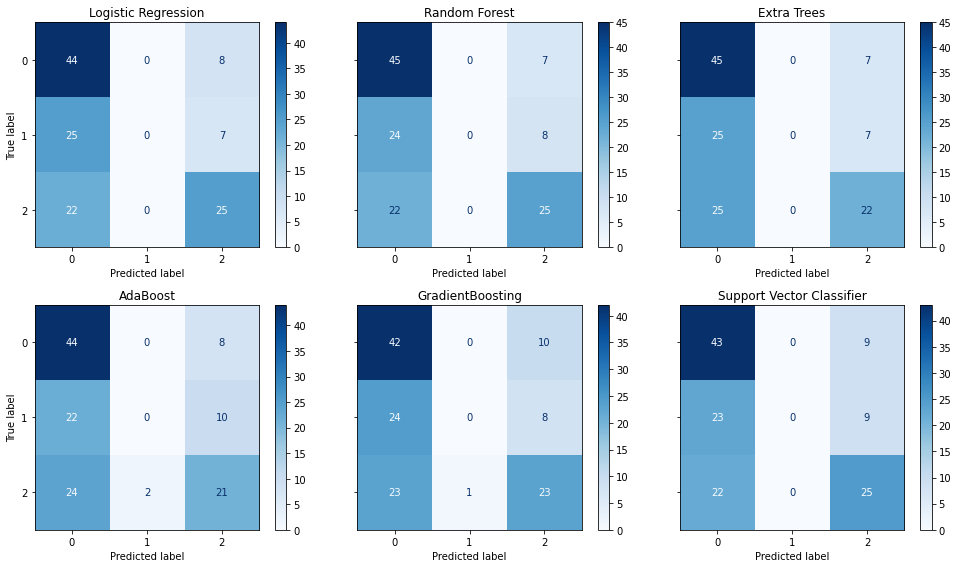

In [84]:
subplot_confusion_matrix(model_var, model_name, Xmm_test, y_test)

As the target variable has 3 classes and is imbalanced, we could not rely on the model accuracy to judge the performance. We decide to use F1 Score. F1 Score is a way of combining the precision and recall of the model. It can measure better when comes to distinguishing the classes. Using F1 Score, we can balanced the importance of precision and recall.

There are three different variants when comes to the to F1 Score; Micro Average, Macro Average and Weighted Average. The most simple method which is Macro Average is computed as a simple arithmetic mean of our per-class F1-scores. For weighted average, we gave weight to each class. For Micro Average, we basically look at all the samples together and do the average. Thus, giving the same recall, precision and F1 Score. So for an imbalanced data, we will be using the Micro average method.

Based on the models we have trained, Random Forest have the highest F1 Score and also the highest test accuracy. In fact, it fares the best in all metrics. However, in the confusion metics, it is unable to predict any draw games, as there are 32 drawn games. Other than that, it is able to predict most of the home wins and away wins. 

We will be selecting Random Forest as the production model. 

Random Forest contains a bundle of decision trees to make a classification. It is also considered a saving technique when it comes to overfitting of a decision tree model. A decision tree model has high variance and low bias which can give us pretty unstable output unlike the commonly adopted logistic regression, which has high bias and low variance. Therefore, Random Forest is used.

Advantages
- It reduces overfitting in decision trees and helps to improve the accuracy
- It is flexible to both classification and regression problems
- It works well with both categorical and continuous values
- It automates missing values present in the data
- Normalising of data is not required as it uses a rule-based approach.

Disadvantages 
- It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
- It also requires much time for training as it combines a lot of decision trees to determine the class.
- Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.


In [85]:
#Saving scaler as pickle
filename = 'pkl/scaler.pkl'
pickle.dump(mm, open(filename, 'wb'))

In [86]:
#Saving model as pickle
filename = 'pkl/production_model.pkl'
pickle.dump(rf, open(filename, 'wb'))